What we downloaded is Planck catalogs.

In [50]:
import numpy as np

filename = "/Users/ding/Downloads/halos_0"

# This halo type is new as of Sept. 2016
# The "Neff3" sims use it; the "planck" sims use the old dtype
#halo_type = np.dtype([("gid",np.int64),("N",np.int64),("x",np.float32,3),("v",np.float32,3),("sigma_v",np.float32,3),
#                       ("r25",np.float32),("r50",np.float32),("r75",np.float32),("r90",np.float32),
#                       ("vcirc_max",np.float32),("rvcirc_max",np.float32),
#                       ("pf_start",np.int64),("pf_np",np.int64)])

#This is the old dtype that the "planck" sims use
#num_groups is also 32-bit in this version; see below.
halo_type = np.dtype([("gid",np.int32),("N",np.int32),("Position",np.float32,3),("v",np.float32,3),("sigma_v",np.float32,3),
                      ("r25",np.float32),("r50",np.float32),("r75",np.float32),("r90",np.float32),
                      ("pf_start",np.int64),("pf_np",np.int32)])

fp = open(filename,"rb")

#we first read the total number of groups, just so we don't have to deal with it not being halo_type
num_groups = np.fromfile(fp,dtype=np.int32,count=1)  # NOTE: this uses np.int32 with the old halo dtype
print(num_groups)

[1297520]


In [51]:
halos = np.fromfile(fp,dtype=halo_type)

In [52]:
print(halos)

[ (      0, 105835, [-0.37403375,  0.06187559,  0.32598749], [-0.0030261 ,  0.00091194,  0.00050777], [ 0.01571805,  0.01938944,  0.01615746],   9.87340813e-04,   1.57746335e-03,  0.00215333,  0.00261515,        0, 10580)
 (      1,  85752, [-0.25992078, -0.41617808,  0.12623017], [ 0.00087401,  0.00065161, -0.0041647 ], [ 0.01437996,  0.01328415,  0.01738182],   1.07903010e-03,   1.70135486e-03,  0.0023814 ,  0.00289032,    10580,  8530)
 (      2,  79582, [-0.22334227, -0.46090865,  0.20009035], [-0.00287477,  0.00541451, -0.0001645 ], [ 0.02000825,  0.01585446,  0.01493386],   6.27144822e-04,   1.21005834e-03,  0.0019134 ,  0.00257296,    19110,  7873)
 ...,
 (1340616,     30, [-0.16719955,  0.44681725,  0.47114328], [-0.00473511, -0.00026293,  0.00814649], [ 0.00065897,  0.0005725 ,  0.00076932],   1.07802072e-04,   1.53549830e-04,  0.00019062,  0.00024076, 26137540,     5)
 (1340618,     30, [-0.1686196 ,  0.49417335,  0.49076039], [-0.00586702, -0.00398773,  0.00464996], [ 0.0006

In [53]:
print(halos.dtype)

[('gid', '<i4'), ('N', '<i4'), ('Position', '<f4', (3,)), ('v', '<f4', (3,)), ('sigma_v', '<f4', (3,)), ('r25', '<f4'), ('r50', '<f4'), ('r75', '<f4'), ('r90', '<f4'), ('pf_start', '<i8'), ('pf_np', '<i4')]


In [54]:
halos.data

In [55]:
import nbodykit.lab as nlab

In [56]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
cat = nlab.ArrayCatalog(halos)

In [58]:
cat.columns

['N',
 'Position',
 'Selection',
 'Weight',
 'gid',
 'pf_np',
 'pf_start',
 'r25',
 'r50',
 'r75',
 'r90',
 'sigma_v',
 'v']

In [76]:
cat.attrs['BoxSize']=720.0

In [77]:
cat.attrs

{'BoxSize': 720.0}

In [35]:
help(nlab.FFTPower)

Help on class FFTPower in module nbodykit.algorithms.fftpower:

class FFTPower(FFTPowerBase)
 |  Algorithm to compute the 1d or 2d power spectrum and/or multipoles
 |  in a periodic box, using a Fast Fourier Transform (FFT)
 |  
 |  Notes
 |  -----
 |  The algorithm saves the power spectrum results to a plaintext file, 
 |  as well as the meta-data associted with the algorithm. The names of the
 |  columns saved to file are:
 |  
 |      - k : 
 |          the mean value for each `k` bin
 |      - mu : 2D power only
 |          the mean value for each `mu` bin
 |      - power.real, power.imag : 1D/2D power only
 |          the real and imaginary components of 1D power
 |      - power_X.real, power_X.imag : multipoles only
 |          the real and imaginary components for the `X` multipole
 |      - modes : 
 |          the number of Fourier modes averaged together in each bin
 |  
 |  The plaintext files also include meta-data associated with the algorithm:
 |  
 |      - Lx, Ly, Lz : 

In [78]:
r = nlab.FFTPower(cat, mode='2d', Nmesh=128)

In [79]:
r.attrs

{'BoxSize': array([ 720.,  720.,  720.]),
 'Lx': 720.0,
 'Ly': 720.0,
 'Lz': 720.0,
 'N1': 1297520,
 'N2': 1297520,
 'Nmesh': array([128, 128, 128]),
 'Nmu': 5,
 'dk': 0.0087266462599716477,
 'kmin': 0.0,
 'los': [0, 0, 1],
 'mode': '2d',
 'poles': [],
 'shotnoise': 287.66261791725753,
 'volume': 373248000.0}

In [82]:
r.power['k'].shape

(64, 5)

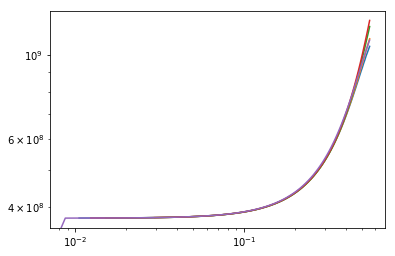

In [81]:
plot(r.power['k'], abs(r.power['power']))
xscale("log")
yscale("log")